<a href="https://colab.research.google.com/github/macorony/NeuralNetwork/blob/main/Image_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transforming and augmenting images

In [8]:
import torch
import torchvision.transforms as transforms
from torchvision.transforms import v2
from torchvision.io import decode_image
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
import torchvision.transforms.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def show(imgs):
  # imgs is tensor objective
  if not isinstance(imgs, list):
    imgs = [imgs]
  fig, axs = plt.subplots(figsize=(10, 6), ncols=len(imgs), squeeze=False)
  for i, img in enumerate(imgs):
    img = img.detach()
    img = F.to_pil_image(img)
    axs[0,i].imshow(np.asarray(img))

<class 'torch.Tensor'>


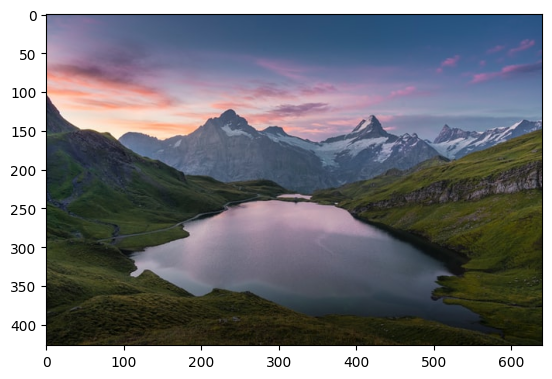

In [10]:
img = read_image('/content/drive/MyDrive/file_transmission/pic.jpg')
print(type(img))
show(img)

<class 'torchvision.tv_tensors._image.Image'>


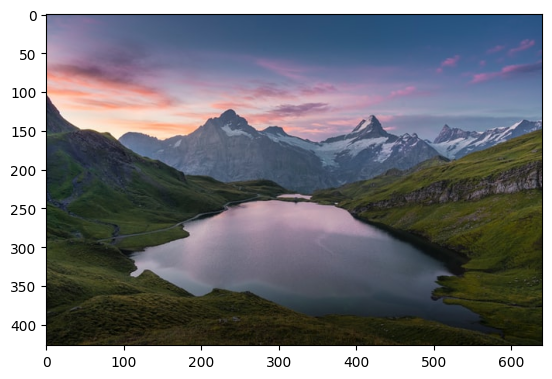

In [11]:
img_transform_v2 = v2.Compose([v2.ToImage()])
img_tensor = img_transform_v2(img)
print(type(img_tensor))
show(img_tensor)

## No Augmentation

In [12]:
img_1 = Image.open("/content/drive/MyDrive/file_transmission/pic.jpg")

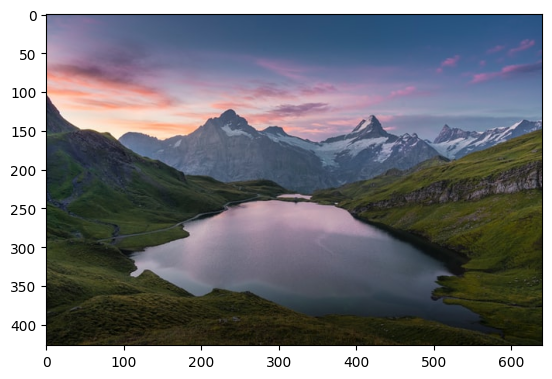

In [13]:
img_transform = transforms.Compose([transforms.ToTensor()])
img_tensor = img_transform(img_1)
show(img_tensor)

## Horizontal flip with 50% probability

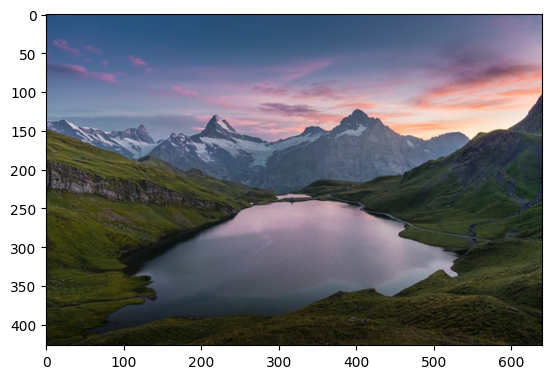

In [14]:
img_transform = transforms.Compose([transforms.ToTensor(), transforms.RandomHorizontalFlip(p=0.5)])
img_tensor = img_transform(img_1)
plt.imshow(img_tensor.permute(1,2,0))

## Rotation

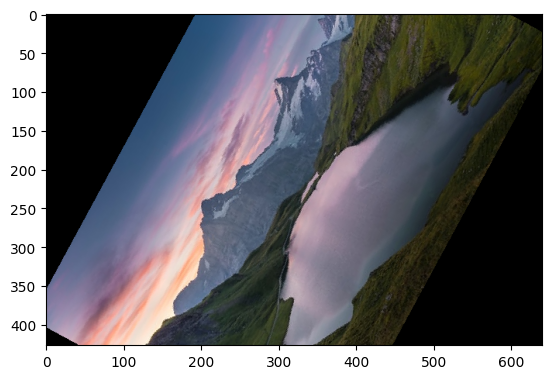

In [15]:
img_transform = transforms.Compose([transforms.ToTensor(), transforms.RandomRotation(degrees=90)])
img_tensor = img_transform(img_1)
plt.imshow(img_tensor.permute(1,2,0))

## Normalize

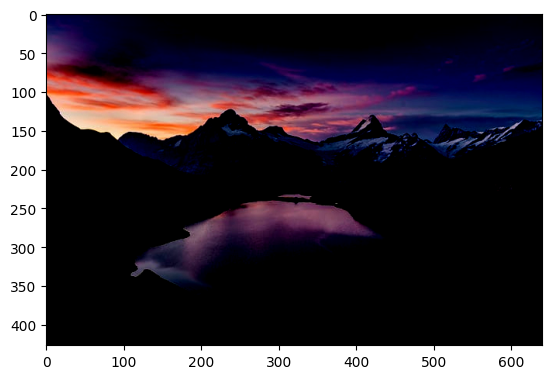

In [16]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(std=(0.5,0.5,0.5),
                                                                            mean=(0.5,0.5,0.5))])
img_tensor = transform(img_1)
plt.imshow(img_tensor.permute(1,2,0))

## Crop and ounding boxes

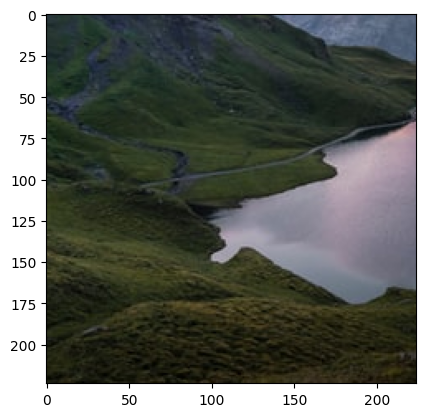

In [17]:
transforms = v2.RandomCrop(size=(224, 224))
output = transforms(img_1)
plt.imshow(output)

In [18]:
from torchvision import tv_tensors
boxes = tv_tensors.BoundingBoxes(
    [[15, 10, 370, 510],
     [275, 340, 510, 510],
     [130, 345, 210, 425]],
    format="XYXY", canvas_size=img.shape[-2:]
)

In [19]:
transform_v2 = v2.Compose([v2.RandomResizedCrop(size=(224, 224)),
                           v2.RandomPhotometricDistort(p=1),
                           v2.RandomHorizontalFlip(p=1)])
out_img, out_boxes = transform_v2(img, boxes)

In [20]:
print(type(out_boxes), type(out_img))

<class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'> <class 'torch.Tensor'>


In [21]:
input = draw_bounding_boxes(img, out_boxes, colors=["yellow", "red", "blue"])
out_result = draw_bounding_boxes(out_img, out_boxes, colors=["yellow", "red", "blue"])

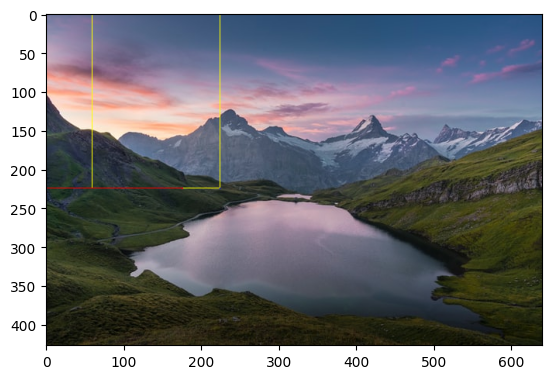

In [22]:
show(input)

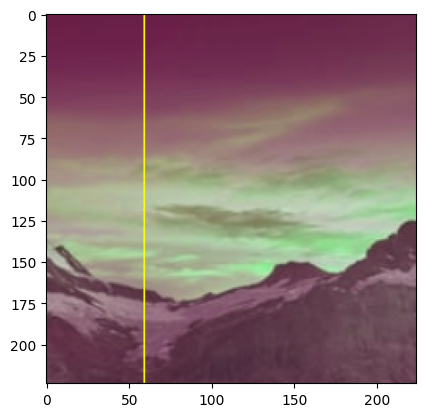

In [23]:
show(out_result)

## Padding

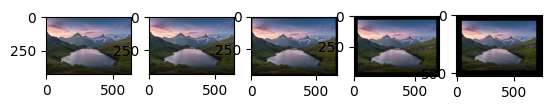

In [24]:
padded_imgs = [v2.Pad(padding=padding)(img) for padding in (3, 10, 30, 50)]
show([img] + padded_imgs)

## Resize

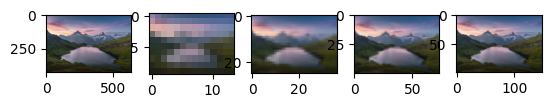

In [25]:
resized_imgs = [v2.Resize(size=size)(img) for size in (10, 25, 50, 100)]
show([img] + resized_imgs)

## CenterCrop

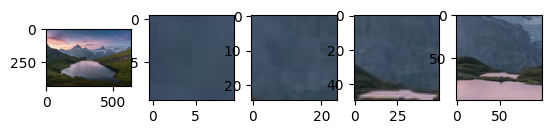

In [26]:
center_crops = [v2.CenterCrop(size=size)(img) for size in (10, 25, 50, 100)]
show([img] + center_crops)

## FiveCrop

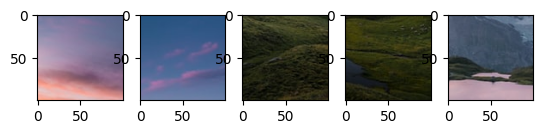

In [27]:
top_left, top_right, bottom_left, bottom_right, center = v2.FiveCrop(size=(100, 100))(img)
show([top_left, top_right, bottom_left, bottom_right, center])

## RandomRotation


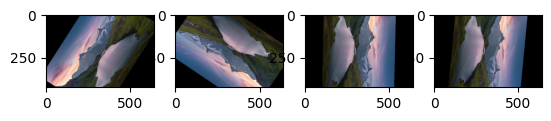

In [28]:
rotation = v2.RandomRotation(degrees=(0, 270))
rotated_imgs = [rotation(img) for _ in range(4)]
show(rotated_imgs)

## RandomPerspective

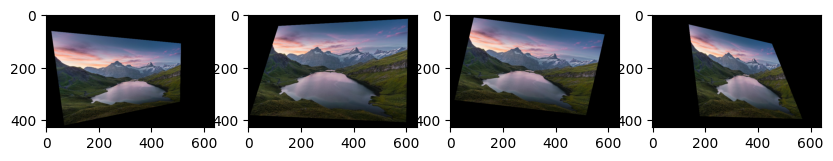

In [34]:
perspective = v2.RandomPerspective(distortion_scale=0.6, p=1.0)
out_imgs = [perspective(img) for _ in range(4)]
show(out_imgs)

## Elastic Transform

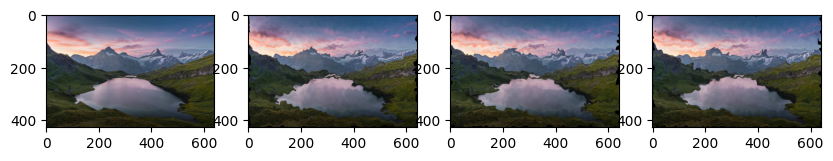

In [33]:
elastic_transformer = v2.ElasticTransform(alpha=250.0)
out_imgs = [elastic_transformer(img) for _ in range(3)]
show([img]+out_imgs)

## Grayscale

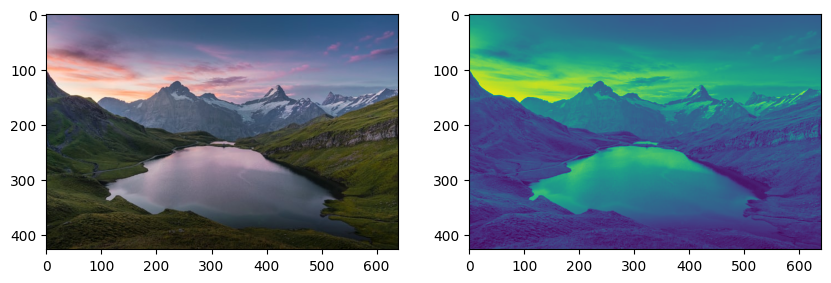

In [35]:
gray_img = v2.Grayscale()(img)
show([img, gray_img])

## Color Jitter
The collorJitter transform randomly change the brightness, contrast, saturation, hue, and other properties of an image.

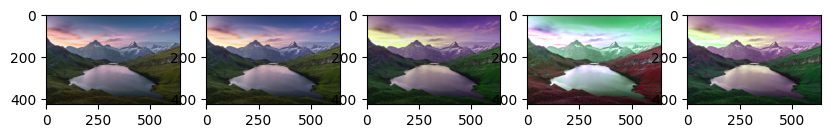

In [37]:
jitter = v2.ColorJitter(brightness=0.5, hue=0.3)
out_imgs = [jitter(img) for _ in range(4)]
show([img] + out_imgs)

## GaussianBlur

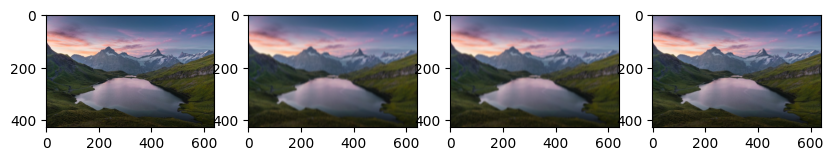

In [39]:
blur_transform = v2.GaussianBlur(kernel_size=(5,9), sigma=(0.1,5.0))
out_imgs = [blur_transform(img) for _ in range(3)]
show([img] + out_imgs)

## RandomInvert

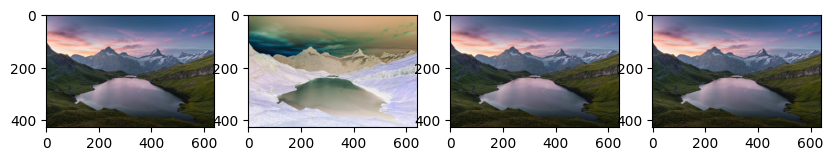

In [41]:
invert_transform = v2.RandomInvert()
out_imgs = [invert_transform(img) for _ in range(4)]
show(out_imgs)

## RandomPosterize
randomly posterizes the image by reducing the number of bits of each color channel.

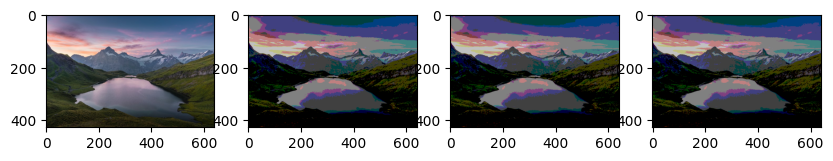

In [42]:
posterize_transform = v2.RandomPosterize(bits=2)
out_imgs = [posterize_transform(img) for _ in range(4)]
show(out_imgs)

## RandomSolarize

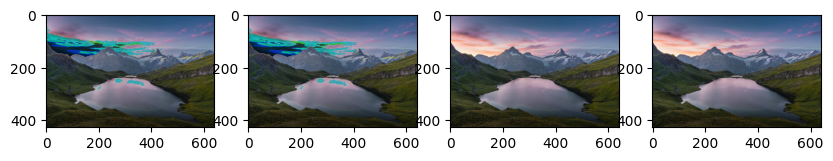

In [43]:
solarize_transforms = v2.RandomSolarize(threshold=192.0)
out_imgs = [solarize_transforms(img) for _ in range(4)]
show(out_imgs)

## RandomAdjustSharpness


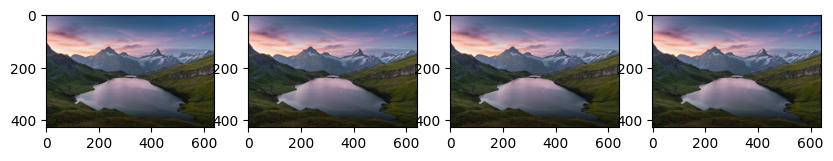

In [44]:
sharpness_transform = v2.RandomAdjustSharpness(sharpness_factor=2)
out_imgs = [sharpness_transform(img) for _ in range(4)]
show(out_imgs)

## RandomEqualize

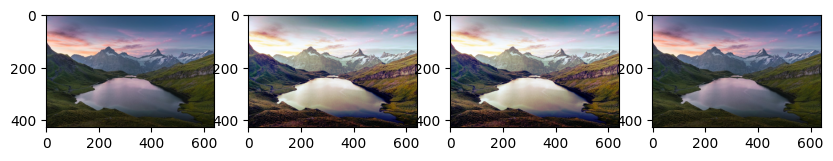

In [45]:
equalize_transform = v2.RandomEqualize()
out_imgs = [equalize_transform(img) for _ in range(4)]
show(out_imgs)

## AutoAugment

In [51]:
policies = [v2.AutoAugmentPolicy.CIFAR10, v2.AutoAugmentPolicy.IMAGENET, v2.AutoAugmentPolicy.SVHN]
augmenters = [v2.AutoAugment(policy) for policy in policies]
out_imgs = [
    [augmenter(img) for _ in range(4)] for augmenter in augmenters
    ]

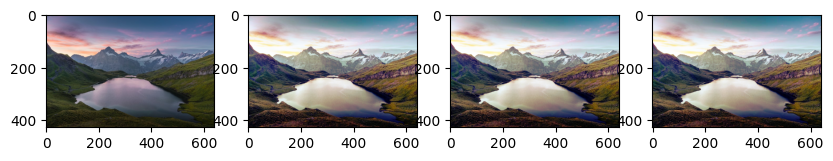

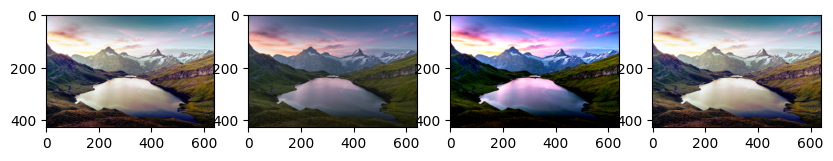

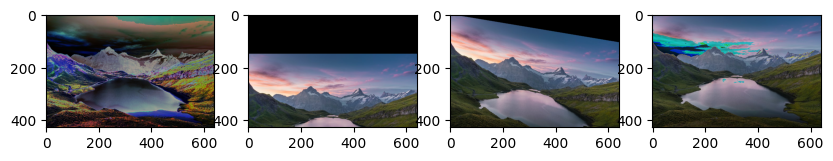

In [54]:
for i, img in enumerate(out_imgs):
  show(img)

## RandomHorizontalFlip

In [63]:
hflipper = v2.RandomHorizontalFlip(p=0.5)
out_imgs = [hflipper(img) for _ in range(4)]

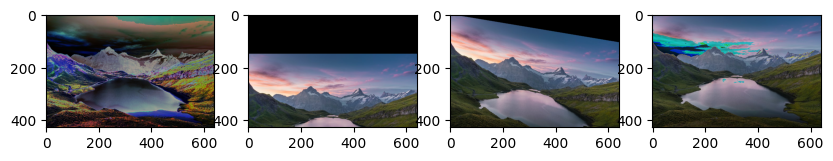

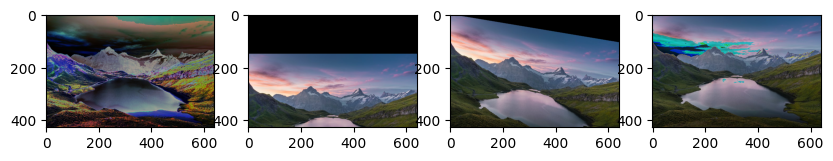

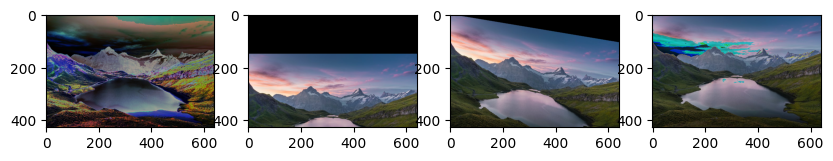

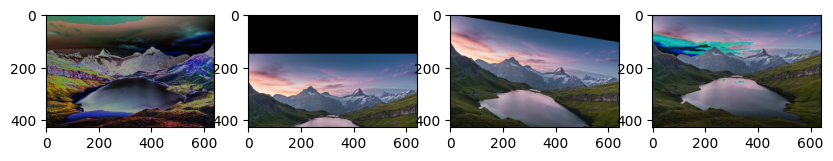

In [64]:
for i, img in enumerate(out_imgs):
  show(img)

## RandomVerticalFlip

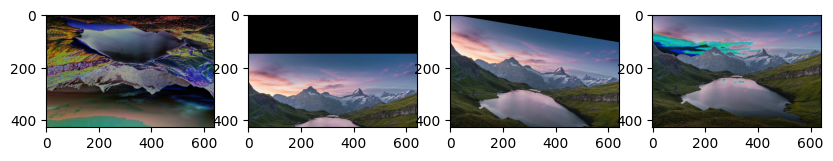

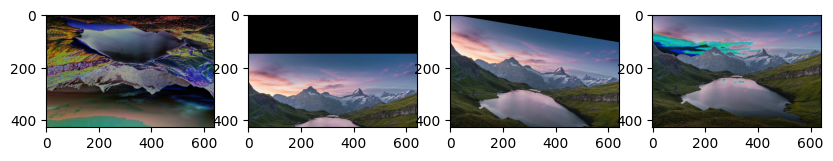

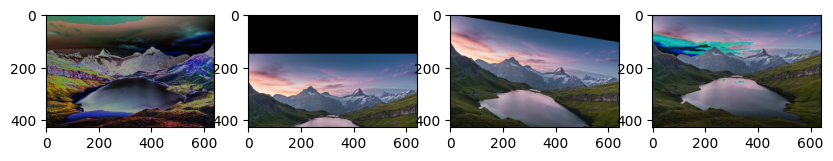

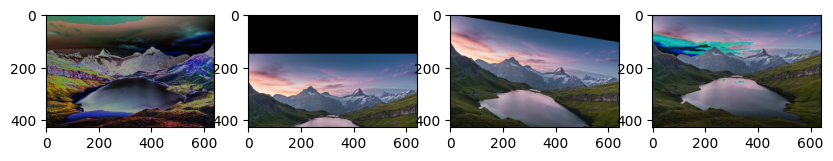

In [67]:
vflipper = v2.RandomVerticalFlip(p=0.5)
out_imgs = [vflipper(img) for _ in range(4)]
for i, img in enumerate(out_imgs):
  show(img)

## RandomApply

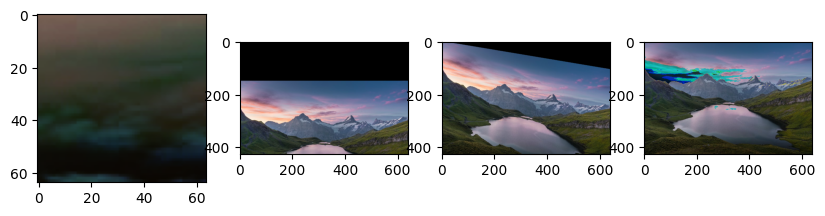

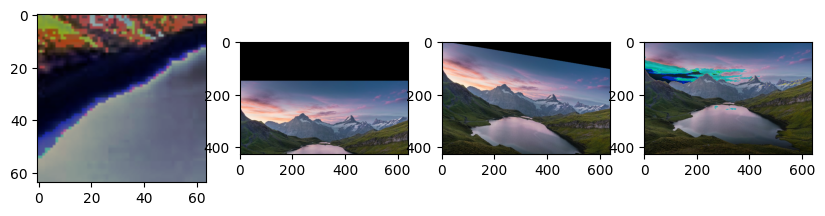

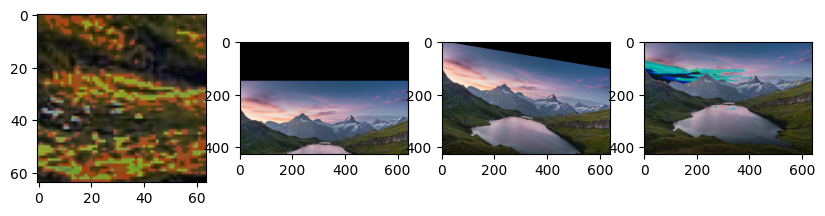

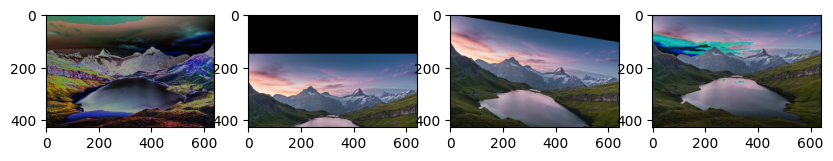

In [69]:
applier = v2.RandomApply(transforms=[v2.RandomCrop(size=(64,64))], p=0.5)
out_imgs = [applier(img) for _ in range(4)]
for i, img in enumerate(out_imgs):
  show(img)